(**You can also open this notebook in Google Colab**)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/data-programming-with-python/blob/main/2023-fall/2023-10-10/notebook/code_demo.ipynb)

# Time Series Data Operations

## Basic Python library - `datetime`

### timestamps and dates

In [1]:
import datetime

In [2]:
dts = datetime.datetime(year=2023,month=1,day=1,hour=0,minute=0,second=0)
dts

datetime.datetime(2023, 1, 1, 0, 0)

In [3]:
print(f"The year: {dts.year}")
print(f"The year: {dts.month}")
print(f"The year: {dts.day}")
print(f"The year: {dts.hour}")
print(f"The year: {dts.minute}")
print(f"The year: {dts.second}")

The year: 2023
The year: 1
The year: 1
The year: 0
The year: 0
The year: 0


In [4]:
dt = datetime.date(year=2023, month=1, day=1)
dt

datetime.date(2023, 1, 1)

In [5]:
ts = datetime.time(hour=0, minute=0, second=1)
ts

datetime.time(0, 0, 1)

| Type      | Description                                                                     |
|-----------|---------------------------------------------------------------------------------|
| date      | Store calendar date (year, month, day) using the Gregorian calendar             |
| time      | Store time of day as hours, minutes, seconds, and microseconds                  |
| datetime  | Store both date and time                                                        |
| timedelta | The difference between two datetime values (as days, seconds, and microseconds) |
| tzinfo    | Base type for storing time zone information                                     |

In [6]:
current_dts = datetime.datetime.now()
current_dts

datetime.datetime(2023, 10, 8, 14, 41, 14, 714995)

In [7]:
current_dt = datetime.datetime.now().date()
current_dt

datetime.date(2023, 10, 8)

In [8]:
current_dt = datetime.date.today()
current_dt

datetime.date(2023, 10, 8)

### time `delta`

```python
A timedelta object represents a duration, the difference between two dates or times.

class datetime.timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)
```
[[Official Documentation](https://docs.python.org/3/library/datetime.html#timedelta-objects)]

In [9]:
delta = datetime.datetime.now.date() - datetime.datetime(2023,1,1)
delta

AttributeError: 'builtin_function_or_method' object has no attribute 'date'

In [10]:
delta = current_dt - datetime.datetime(2023,1,1)
delta

TypeError: unsupported operand type(s) for -: 'datetime.date' and 'datetime.datetime'

In [11]:
delta = current_dt - datetime.date(2023,1,1)
delta

datetime.timedelta(days=280)

In [12]:
type(delta)

datetime.timedelta

In [13]:
print(f"Diff in days: {delta.days}")
print(f"Diff in seconds: {delta.seconds}")

Diff in days: 280
Diff in seconds: 0


### Conversion between `string` and `datetime`
`strftime()` vs. `strptime()`
[[Official Documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)]

In [14]:
dts = datetime.datetime(2023,1,1)
str(dts)

'2023-01-01 00:00:00'

In [15]:
dts.strftime('%Y-%m-%d')

'2023-01-01'

In [17]:
dts_str = '2023-01-01'
datetime.datetime.strptime(dts_str, '%Y-%m-%d')

datetime.datetime(2023, 1, 1, 0, 0)

In [20]:
import pandas as pd

dts_strs = ['2023-01-01 00:00:00', '2023-01-02 00:00:00', None]
pd.to_datetime(dts_strs)

DatetimeIndex(['2023-01-01', '2023-01-02', 'NaT'], dtype='datetime64[ns]', freq=None)

## `timeseries` in Pandas
Time series data could be represented as a Pandas `Series` with timestamp index values

In [21]:
import numpy as np

In [22]:
dates = [
    datetime.datetime(2023,1,1),
    datetime.datetime(2023,1,2),
    datetime.datetime(2023,1,3),
    datetime.datetime(2023,1,4),
    datetime.datetime(2023,1,5),
    datetime.datetime(2023,1,6)
]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2023-01-01    1.033219
2023-01-02   -0.604558
2023-01-03    1.046813
2023-01-04   -1.074005
2023-01-05    0.165620
2023-01-06    1.190591
dtype: float64

In [24]:
ts.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq=None)

In [29]:
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [30]:
type(ts.index[0])

pandas._libs.tslibs.timestamps.Timestamp

`pandas.Timestamp` vs. `datetime.datetime`
```python
class pandas.Timestamp(ts_input=<object object>, year=None, month=None, day=None, hour=None, minute=None, second=None, microsecond=None, tzinfo=None, *, nanosecond=None, tz=None, unit=None, fold=None)
```
Pandas replacement for python datetime.datetime object.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. It’s the type used for the entries that make up a DatetimeIndex, and other timeseries oriented data structures in pandas.

[[Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html#pandas-timestamp)]

**ATTENTION**
</br>
</br>
A `pandas.Timestamp` can be substituted most places where you would use a `datetime` object. The reverse is not true, however, because `pandas.Timestamp` can store nanosecond precision data (pandas stores timestamps using NumPy’s `datetime64` data type at the nanosecond resolution), while `datetime` stores only up to `microseconds`. Additionally, `pandas.Timestamp` can store frequency information (if any) and understands how to do time zone conversions and other kinds of manipulations.

In [31]:
ts.index[0]

Timestamp('2023-01-01 00:00:00')

In [28]:
ts[0:2]

2023-01-01    1.033219
2023-01-02   -0.604558
dtype: float64

In [26]:
ts[::2]

2023-01-01    1.033219
2023-01-03    1.046813
2023-01-05    0.165620
dtype: float64

Arithmetic operations between differently indexed time series automatically align on the dates:

In [25]:
ts + ts[::2]

2023-01-01    2.066438
2023-01-02         NaN
2023-01-03    2.093626
2023-01-04         NaN
2023-01-05    0.331240
2023-01-06         NaN
dtype: float64

### Create time series data out of a file

In [39]:
min_daily_temperature = pd.read_csv('../data/daily-min-temperatures.csv')
min_daily_temperature.head(3)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8


In [41]:
# min_daily_temperature.set_index('Date')
min_daily_temperature.set_index('Date', inplace=True)
min_daily_temperature.head(3)


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8


In [43]:
import matplotlib.pyplot as plt

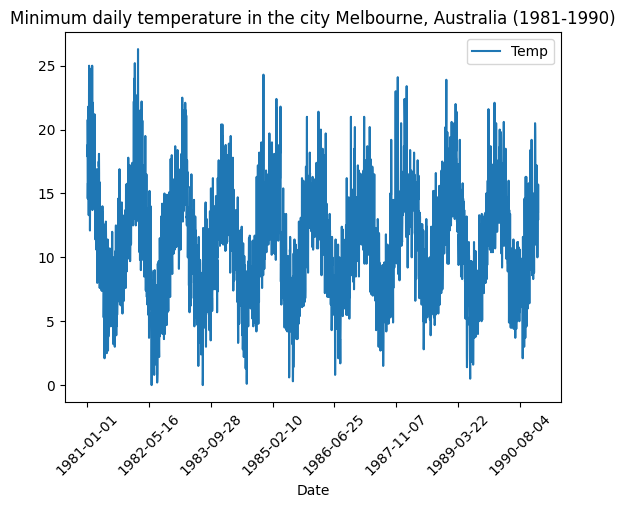

In [44]:
min_daily_temperature.plot(title='Minimum daily temperature in the city Melbourne, Australia (1981-1990)')
plt.xticks(rotation=45)
plt.show()

### Generate date ranges in Pandas

In [65]:
index = pd.date_range("2023-04-01", "2023-04-10", freq='D')
index

DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10'],
              dtype='datetime64[ns]', freq='D')

In [66]:
type(index)

pandas.core.indexes.datetimes.DatetimeIndex

In [69]:
#### By default the date_range() function generate daily timestamps
#### periods represents time spans
pd.date_range(start="2023-04-01", periods=20)

DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20'],
              dtype='datetime64[ns]', freq='D')

* Available frequency string patterns https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects

In [70]:
pd.date_range("2023-01-01", "2023-06-01", freq="BM")

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-28',
               '2023-05-31'],
              dtype='datetime64[ns]', freq='BM')

In [71]:
pd.date_range("2023-01-01", "2023-06-01", freq="W")

DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05', '2023-02-12', '2023-02-19',
               '2023-02-26', '2023-03-05', '2023-03-12', '2023-03-19',
               '2023-03-26', '2023-04-02', '2023-04-09', '2023-04-16',
               '2023-04-23', '2023-04-30', '2023-05-07', '2023-05-14',
               '2023-05-21', '2023-05-28'],
              dtype='datetime64[ns]', freq='W-SUN')

In [74]:
#### By default, it keeps the timestamp part
pd.date_range("2023-04-01 12:56:31", periods=5)

DatetimeIndex(['2023-04-01 12:56:31', '2023-04-02 12:56:31',
               '2023-04-03 12:56:31', '2023-04-04 12:56:31',
               '2023-04-05 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [75]:
#### If you want to normalize to the midnight
pd.date_range("2023-04-01 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05'],
              dtype='datetime64[ns]', freq='D')

In [78]:
#### Customized frequency/offsets
pd.date_range("2023-01-01", "2023-01-03 23:59", freq="4H")

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 04:00:00',
               '2023-01-01 08:00:00', '2023-01-01 12:00:00',
               '2023-01-01 16:00:00', '2023-01-01 20:00:00',
               '2023-01-02 00:00:00', '2023-01-02 04:00:00',
               '2023-01-02 08:00:00', '2023-01-02 12:00:00',
               '2023-01-02 16:00:00', '2023-01-02 20:00:00',
               '2023-01-03 00:00:00', '2023-01-03 04:00:00',
               '2023-01-03 08:00:00', '2023-01-03 12:00:00',
               '2023-01-03 16:00:00', '2023-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [90]:
pd.date_range("2023-01-01", "2023-10-10 23:59", freq="2M")

DatetimeIndex(['2023-01-31', '2023-03-31', '2023-05-31', '2023-07-31',
               '2023-09-30'],
              dtype='datetime64[ns]', freq='2M')

In [91]:
pd.date_range("2023-01-01", "2023-10-10 23:59", freq="2MS")

DatetimeIndex(['2023-01-01', '2023-03-01', '2023-05-01', '2023-07-01',
               '2023-09-01'],
              dtype='datetime64[ns]', freq='2MS')

## Select time series data in Pandas

### Select by `Series` index/label

In [32]:
ts

2023-01-01    1.033219
2023-01-02   -0.604558
2023-01-03    1.046813
2023-01-04   -1.074005
2023-01-05    0.165620
2023-01-06    1.190591
dtype: float64

In [33]:
label = ts.index[1]
ts[label]

-0.6045575794136874

In [34]:
ts["2023-01-02"]

-0.6045575794136874

### Select by time slices
For longer time series, you could also use a year or a year and month string to select the corresponding slices of data

In [54]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range("2021-01-01", periods=1000))
longer_ts.head(3)

2021-01-01    0.663047
2021-01-02   -1.428849
2021-01-03    0.897028
Freq: D, dtype: float64

In [55]:
print(f"min_date: {longer_ts.index[0]}")
print(f"max_date: {longer_ts.index[-1]}")

min_date: 2021-01-01 00:00:00
max_date: 2023-09-27 00:00:00


In [56]:
longer_ts['2022'].head(3)

2022-01-01    1.176429
2022-01-02   -1.374061
2022-01-03   -1.150527
Freq: D, dtype: float64

In [57]:
longer_ts['2022-05'].head(3)

2022-05-01    0.038596
2022-05-02   -0.154975
2022-05-03    0.009415
Freq: D, dtype: float64

### Select by `datetime` values

In [58]:
longer_ts[datetime.datetime(2023,1,1)]

0.6211730207460737

In [59]:
ts_range = longer_ts[datetime.datetime(2023,1,1): datetime.datetime(2023,1,31)]
print(f"min_date: {ts_range.index[0]}")
print(f"max_date: {ts_range.index[-1]}")

min_date: 2023-01-01 00:00:00
max_date: 2023-01-31 00:00:00


### Select with `truncate()`

```python
Series.truncate(before=None, after=None, axis=None, copy=None)
```
Truncate a Series or DataFrame before and after some index value. This is a useful shorthand for boolean indexing based on index values above or below certain thresholds.


[[Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.truncate.html#pandas-series-truncate)]

In [61]:
longer_ts.truncate(before='2023-01-01', after='2023-01-05')

2023-01-01    0.621173
2023-01-02    1.200538
2023-01-03   -0.393135
2023-01-04   -1.105128
2023-01-05   -0.652792
Freq: D, dtype: float64

## Shift `time series`

### "Naive" shifts

In [81]:
ts = pd.Series(np.random.randn(10), index=pd.date_range('2023-01-01', periods=10, freq='M'))
ts

2023-01-31   -1.471054
2023-02-28   -1.225073
2023-03-31   -0.465266
2023-04-30    0.031127
2023-05-31    0.867263
2023-06-30    0.991432
2023-07-31   -0.101687
2023-08-31    0.087047
2023-09-30   -2.409025
2023-10-31   -0.101804
Freq: M, dtype: float64

In [82]:
ts.shift(2)

2023-01-31         NaN
2023-02-28         NaN
2023-03-31   -1.471054
2023-04-30   -1.225073
2023-05-31   -0.465266
2023-06-30    0.031127
2023-07-31    0.867263
2023-08-31    0.991432
2023-09-30   -0.101687
2023-10-31    0.087047
Freq: M, dtype: float64

In [83]:
ts.shift(-2)

2023-01-31   -0.465266
2023-02-28    0.031127
2023-03-31    0.867263
2023-04-30    0.991432
2023-05-31   -0.101687
2023-06-30    0.087047
2023-07-31   -2.409025
2023-08-31   -0.101804
2023-09-30         NaN
2023-10-31         NaN
Freq: M, dtype: float64

### Compute consecutive % changes

In [84]:
ts / ts.shift(1) - 1

2023-01-31          NaN
2023-02-28    -0.167214
2023-03-31    -0.620214
2023-04-30    -1.066902
2023-05-31    26.861817
2023-06-30     0.143174
2023-07-31    -1.102566
2023-08-31    -1.856032
2023-09-30   -28.674913
2023-10-31    -0.957741
Freq: M, dtype: float64

### Shift based on frequency

In [86]:
ts

2023-01-31   -1.471054
2023-02-28   -1.225073
2023-03-31   -0.465266
2023-04-30    0.031127
2023-05-31    0.867263
2023-06-30    0.991432
2023-07-31   -0.101687
2023-08-31    0.087047
2023-09-30   -2.409025
2023-10-31   -0.101804
Freq: M, dtype: float64

In [87]:
ts.shift(2, freq='M')

2023-03-31   -1.471054
2023-04-30   -1.225073
2023-05-31   -0.465266
2023-06-30    0.031127
2023-07-31    0.867263
2023-08-31    0.991432
2023-09-30   -0.101687
2023-10-31    0.087047
2023-11-30   -2.409025
2023-12-31   -0.101804
Freq: M, dtype: float64

In [88]:
ts.shift(3, freq="D")

2023-02-03   -1.471054
2023-03-03   -1.225073
2023-04-03   -0.465266
2023-05-03    0.031127
2023-06-03    0.867263
2023-07-03    0.991432
2023-08-03   -0.101687
2023-09-03    0.087047
2023-10-03   -2.409025
2023-11-03   -0.101804
dtype: float64

In [89]:
ts.shift(1, freq="90T")

2023-01-31 01:30:00   -1.471054
2023-02-28 01:30:00   -1.225073
2023-03-31 01:30:00   -0.465266
2023-04-30 01:30:00    0.031127
2023-05-31 01:30:00    0.867263
2023-06-30 01:30:00    0.991432
2023-07-31 01:30:00   -0.101687
2023-08-31 01:30:00    0.087047
2023-09-30 01:30:00   -2.409025
2023-10-31 01:30:00   -0.101804
dtype: float64

## Resampling

`Resampling` refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency is called `downsampling`, while converting lower frequency to higher frequency is called `upsampling`.

```python
Series.resample(rule, axis=_NoDefault.no_default, closed=None, label=None, convention='start', kind=None, on=None, level=None, origin='start_day', offset=None, group_keys=False)
```
- Resample time-series data.
- Convenience method for frequency conversion and resampling of time series. The object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or the caller must pass the label of a datetime-like series/index to the on/level keyword parameter.

[[Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.resample.html#pandas.Series.resample)]

### `Downsampling`

In [112]:
index = pd.date_range('1/1/2023', periods=9, freq='T')
series = pd.Series(range(1,10), index=index)
series

2023-01-01 00:00:00    1
2023-01-01 00:01:00    2
2023-01-01 00:02:00    3
2023-01-01 00:03:00    4
2023-01-01 00:04:00    5
2023-01-01 00:05:00    6
2023-01-01 00:06:00    7
2023-01-01 00:07:00    8
2023-01-01 00:08:00    9
Freq: T, dtype: int64

In [113]:
# Downsample the series into 3 minute bins and sum the values of the timestamps falling into a bin.

series.resample('3T').sum()

2023-01-01 00:00:00     6
2023-01-01 00:03:00    15
2023-01-01 00:06:00    24
Freq: 3T, dtype: int64

In [114]:
# Downsample the series into 3 minute bins as above, but label each bin using the right edge instead of the left.
# Please note that the value in the bucket used as the label is not included in the bucket, which it labels.

series.resample('3T', label='right').sum()

# By default, the left boundary of the bucket is inclusive, the right boundary of the bucket is exclusive

2023-01-01 00:03:00     6
2023-01-01 00:06:00    15
2023-01-01 00:09:00    24
Freq: 3T, dtype: int64

In [115]:
# To include the right boundary of the bin interval
series.resample('3T', label='right', closed='right').sum()

2023-01-01 00:00:00     1
2023-01-01 00:03:00     9
2023-01-01 00:06:00    18
2023-01-01 00:09:00    17
Freq: 3T, dtype: int64

### `Upsampling`

In [117]:
series.resample('30S').asfreq()


2023-01-01 00:00:00    1.0
2023-01-01 00:00:30    NaN
2023-01-01 00:01:00    2.0
2023-01-01 00:01:30    NaN
2023-01-01 00:02:00    3.0
2023-01-01 00:02:30    NaN
2023-01-01 00:03:00    4.0
2023-01-01 00:03:30    NaN
2023-01-01 00:04:00    5.0
2023-01-01 00:04:30    NaN
2023-01-01 00:05:00    6.0
2023-01-01 00:05:30    NaN
2023-01-01 00:06:00    7.0
2023-01-01 00:06:30    NaN
2023-01-01 00:07:00    8.0
2023-01-01 00:07:30    NaN
2023-01-01 00:08:00    9.0
Freq: 30S, dtype: float64

```python
Series.ffill(*, axis=None, inplace=False, limit=None, downcast=_NoDefault.no_default)
```
- Fill NA/NaN values by propagating the last valid observation to next valid.
[[Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.ffill.html#pandas-series-ffill)]

In [119]:
# Upsample the series into 30 second bins and fill the NaN values using the ffill method.
series.resample('30S').ffill().head(10)

2023-01-01 00:00:00    1
2023-01-01 00:00:30    1
2023-01-01 00:01:00    2
2023-01-01 00:01:30    2
2023-01-01 00:02:00    3
2023-01-01 00:02:30    3
2023-01-01 00:03:00    4
2023-01-01 00:03:30    4
2023-01-01 00:04:00    5
2023-01-01 00:04:30    5
Freq: 30S, dtype: int64

In [120]:
# Upsample the series into 30 second bins and fill the NaN values using the bfill method.

series.resample('30S').bfill().head(10)

2023-01-01 00:00:00    1
2023-01-01 00:00:30    2
2023-01-01 00:01:00    2
2023-01-01 00:01:30    3
2023-01-01 00:02:00    3
2023-01-01 00:02:30    4
2023-01-01 00:03:00    4
2023-01-01 00:03:30    5
2023-01-01 00:04:00    5
2023-01-01 00:04:30    6
Freq: 30S, dtype: int64

### Resample with customized logic

In [121]:
series.resample('3T').apply(lambda x: np.sum(x) + 5)

2023-01-01 00:00:00    11
2023-01-01 00:03:00    20
2023-01-01 00:06:00    29
Freq: 3T, dtype: int64

### Other resampling examples - `PeriodIndex`

In [122]:
s = pd.Series(range(1,5), index=pd.period_range('2012-01-01', freq='A', periods=4))
s

2012    1
2013    2
2014    3
2015    4
Freq: A-DEC, dtype: int64

In [123]:
s.resample('Q').asfreq()

2012Q1    1.0
2012Q2    NaN
2012Q3    NaN
2012Q4    NaN
2013Q1    2.0
2013Q2    NaN
2013Q3    NaN
2013Q4    NaN
2014Q1    3.0
2014Q2    NaN
2014Q3    NaN
2014Q4    NaN
2015Q1    4.0
2015Q2    NaN
2015Q3    NaN
2015Q4    NaN
Freq: Q-DEC, dtype: float64

In [124]:
s.resample('Q', convention='end').asfreq()

2012Q4    1.0
2013Q1    NaN
2013Q2    NaN
2013Q3    NaN
2013Q4    2.0
2014Q1    NaN
2014Q2    NaN
2014Q3    NaN
2014Q4    3.0
2015Q1    NaN
2015Q2    NaN
2015Q3    NaN
2015Q4    4.0
Freq: Q-DEC, dtype: float64

In [126]:
q = pd.Series(range(1,5), index=pd.period_range('2012-01-01', freq='Q', periods=4))
q

2012Q1    1
2012Q2    2
2012Q3    3
2012Q4    4
Freq: Q-DEC, dtype: int64

In [127]:
q.resample('M', convention='end').asfreq()

2012-03    1.0
2012-04    NaN
2012-05    NaN
2012-06    2.0
2012-07    NaN
2012-08    NaN
2012-09    3.0
2012-10    NaN
2012-11    NaN
2012-12    4.0
Freq: M, dtype: float64

### On `DataFrame` objects

In [128]:
d = {'price': [10, 11, 9, 13, 14, 18, 17, 19],
      'volume': [50, 60, 40, 100, 50, 100, 40, 50]}
df = pd.DataFrame(d)
df['week_starting'] = pd.date_range('01/01/2018',
                                     periods=8,
                                     freq='W')
df

,price,volume,week_starting
0,10,50,2018-01-07
1,11,60,2018-01-14
2,9,40,2018-01-21
3,13,100,2018-01-28
4,14,50,2018-02-04
5,18,100,2018-02-11
6,17,40,2018-02-18
7,19,50,2018-02-25


In [131]:
df.resample('M', on='week_starting').mean()

,price,volume
week_starting,,
2018-01-31,10.75,62.5
2018-02-28,17.00,60.0


In [132]:
start, end = '2000-10-01 23:30:00', '2000-10-02 00:30:00'
rng = pd.date_range(start, end, freq='7min')
ts = pd.Series(np.arange(len(rng)) * 3, index=rng)
ts

2000-10-01 23:30:00     0
2000-10-01 23:37:00     3
2000-10-01 23:44:00     6
2000-10-01 23:51:00     9
2000-10-01 23:58:00    12
2000-10-02 00:05:00    15
2000-10-02 00:12:00    18
2000-10-02 00:19:00    21
2000-10-02 00:26:00    24
Freq: 7T, dtype: int64

In [133]:
ts.resample('17min').sum()

2000-10-01 23:14:00     0
2000-10-01 23:31:00     9
2000-10-01 23:48:00    21
2000-10-02 00:05:00    54
2000-10-02 00:22:00    24
Freq: 17T, dtype: int64

In [134]:
ts.resample('17min', origin='start').sum()

2000-10-01 23:30:00     9
2000-10-01 23:47:00    21
2000-10-02 00:04:00    54
2000-10-02 00:21:00    24
Freq: 17T, dtype: int64

In [135]:
ts.resample('17min', origin='end').sum()

2000-10-01 23:35:00     0
2000-10-01 23:52:00    18
2000-10-02 00:09:00    27
2000-10-02 00:26:00    63
Freq: 17T, dtype: int64

## Moving window functions

In [138]:
close_px_all = pd.read_csv("../data/stock_px.csv", parse_dates=True, index_col=0)

In [140]:
close_px_all.shape

(2214, 4)

In [143]:
close_px_all.head(100)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2003-05-20,8.90,19.42,29.50,919.73
2003-05-21,8.93,18.94,29.89,923.42
2003-05-22,9.12,19.05,30.02,931.87
2003-05-23,9.16,19.09,30.05,933.22


In [141]:
close_px_all.tail(5)

,AAPL,MSFT,XOM,SPX
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


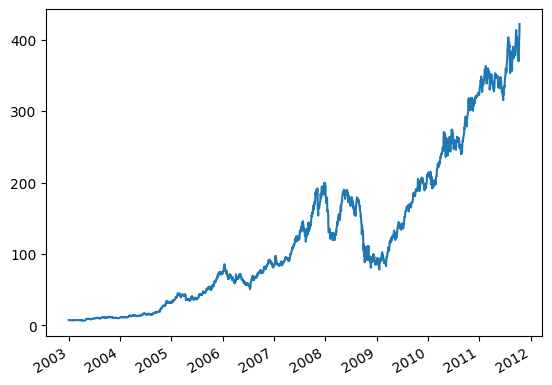

In [144]:
close_px_all["AAPL"].plot()
plt.show()

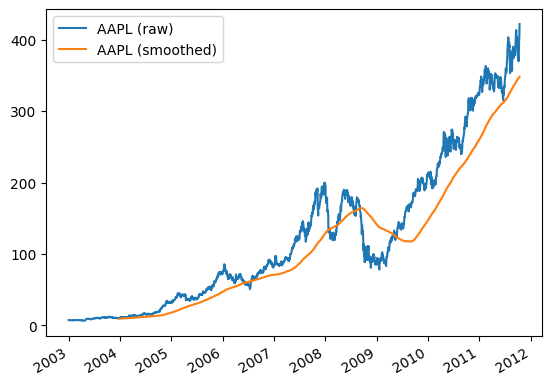

In [147]:
close_px_all["AAPL"].plot(label='AAPL (raw)')
close_px_all["AAPL"].rolling(250).mean().plot(label='AAPL (smoothed)')
plt.legend()
plt.show()

The expression `rolling(250)` is similar in behavior to `groupby`, but instead of grouping, it creates an object that enables grouping over a **250-day sliding window**. So here we have the 250-day moving window average of Apple’s stock price.

In [148]:
close_px_all["AAPL"].pct_change()

2003-01-02         NaN
2003-01-03    0.006757
2003-01-06    0.000000
2003-01-07   -0.002685
2003-01-08   -0.020188
                ...   
2011-10-10    0.051406
2011-10-11    0.029526
2011-10-12    0.004747
2011-10-13    0.015515
2011-10-14    0.033225
Name: AAPL, Length: 2214, dtype: float64

In [157]:
pd.set_option('display.max_rows', None)
close_px_all["AAPL"].pct_change().rolling(250).std().head(20)

2003-01-02   NaN
2003-01-03   NaN
2003-01-06   NaN
2003-01-07   NaN
2003-01-08   NaN
2003-01-09   NaN
2003-01-10   NaN
2003-01-13   NaN
2003-01-14   NaN
2003-01-15   NaN
2003-01-16   NaN
2003-01-17   NaN
2003-01-21   NaN
2003-01-22   NaN
2003-01-23   NaN
2003-01-24   NaN
2003-01-27   NaN
2003-01-28   NaN
2003-01-29   NaN
2003-01-30   NaN
Name: AAPL, dtype: float64

In [159]:
std250 = close_px_all["AAPL"].pct_change().rolling(250, min_periods=10).std()
std250.head(20)


2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
2003-01-21    0.013181
2003-01-22    0.012713
2003-01-23    0.014114
2003-01-24    0.014929
2003-01-27    0.016163
2003-01-28    0.017672
2003-01-29    0.018161
2003-01-30    0.020128
Name: AAPL, dtype: float64

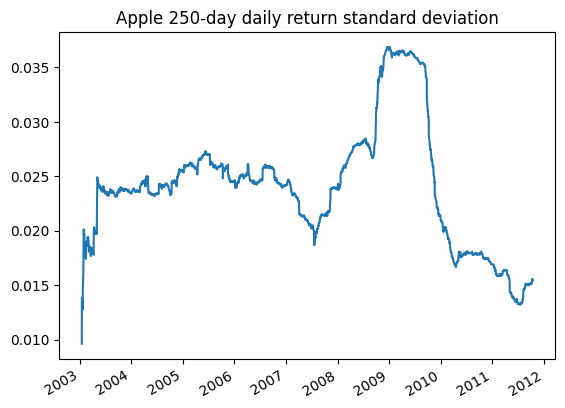

In [161]:
std250.plot()
plt.title("Apple 250-day daily return standard deviation")
plt.show()

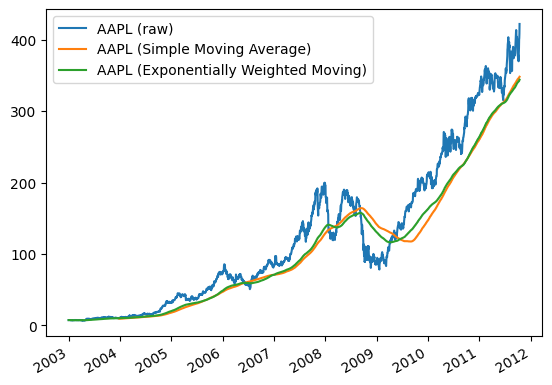

In [163]:
# Rolling with exponentially weighted function
close_px_all["AAPL"].plot(label='AAPL (raw)')
close_px_all["AAPL"].rolling(250).mean().plot(label='AAPL (Simple Moving Average)')
close_px_all["AAPL"].ewm(span=250).mean().plot(label='AAPL (Exponentially Weighted Moving)')
plt.legend()
plt.show()

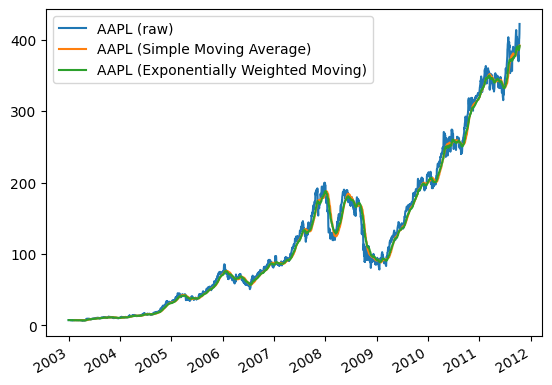

In [164]:
# Rolling with exponentially weighted function
close_px_all["AAPL"].plot(label='AAPL (raw)')
close_px_all["AAPL"].rolling(30).mean().plot(label='AAPL (Simple Moving Average)')
close_px_all["AAPL"].ewm(span=30).mean().plot(label='AAPL (Exponentially Weighted Moving)')
plt.legend()
plt.show()